In [1]:
# in this project we will analyse the data of the champions league ( Football )

In [2]:
# imports 
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# get every data we have 
CoachesData = pd.read_csv("CoachesAppearDetails.csv")
RankingByName = pd.read_csv("AllTimeRankingByClub.csv", encoding='utf-16')


In [4]:
CoachesData.head(5)

,Unnamed: 0,Coach,Club,Appearance
0,0,Carlo Ancelotti,FC Bayern München,12
1,1,Carlo Ancelotti,Chelsea FC,18
2,2,Carlo Ancelotti,AC Milan,73
3,3,Carlo Ancelotti,Real Madrid CF,50
4,4,Carlo Ancelotti,SSC Napoli,12


In [5]:
RankingByName.head(5)

,Position,Club,Country,Participated,Titles,Played,Win,Draw,Loss,Goals For,Goals Against,Pts,Goal Diff
0,1,Real Madrid CF,ESP,53,14,476,285,81,110,1047,521.0,651.0,526.0
1,2,FC Bayern München,GER,39,6,382,229,76,77,804,373.0,534.0,431.0
2,3,FC Barcelona,ESP,33,5,339,197,76,66,667,343.0,470.0,324.0
3,4,Manchester United,ENG,30,3,293,160,69,64,533,284.0,389.0,249.0
4,5,Juventus,ITA,37,2,301,153,70,78,479,301.0,376.0,178.0


In [8]:
# now after visualizing the datasets lets see if there is any NULL, Missing, Ireadable values

In [9]:
import pandas as pd

# Assuming df1, df2, df3, df4 are your DataFrames
for i, df in enumerate([CoachesData, RankingByName, PlayerApearence, GoalStats], start=1):
    print(f"DataFrame {i} Missing Values:\n{df.isnull().sum()}\n")


DataFrame 1 Missing Values:
Unnamed: 0    0
Coach         0
Club          0
Appearance    0
dtype: int64

DataFrame 2 Missing Values:
Position         0
Club             0
Country          0
Participated     0
Titles           0
Played           0
Win              0
Draw             0
Loss             0
Goals For        0
Goals Against    0
Pts              0
Goal Diff        0
dtype: int64

DataFrame 3 Missing Values:
Unnamed: 0     0
Player         0
Club           0
Appearances    0
dtype: int64

DataFrame 4 Missing Values:
Unnamed: 0    0
Season        0
Games         0
Gls           0
Av            0
A             0
B             0
C             0
D             0
E             0
F             0
G             0
H             0
R16           0
QF            0
SF            0
Final         0
dtype: int64



In [10]:
# we can observe that our coulumns are full with meaninful data,
# there is no missing values in our data frames

In [11]:
# now we will check if there is any duplicate rows
import pandas as pd

# Assuming df1, df2, df3, df4 are your DataFrames
for i, df in enumerate([CoachesData, RankingByName, PlayerApearence, GoalStats], start=1):
    print(f"DataFrame {i} duplicate rows:\n{df.duplicated().sum()}\n")


DataFrame 1 duplicate rows:
0

DataFrame 2 duplicate rows:
0

DataFrame 3 duplicate rows:
0

DataFrame 4 duplicate rows:
0



In [5]:
# we can see that our datasets are pretty clean so we will not have much to do,in the cleaning part and that is because of the lown amount of data we have
# one thing tho i obsereved that the second collumn in 3 of my datasets is adding no value so we will just remove that
CoachesData = CoachesData.drop(CoachesData.columns[0], axis=1)

In [14]:
# now let's vesualize and explore our data sets to have a more understanding obout the data we are working with

In [15]:
#first lets see the coaches dataset 
CoachesData.columns
CoachesData.head(2)

,Coach,Club,Appearance
0,Carlo Ancelotti,FC Bayern München,12
1,Carlo Ancelotti,Chelsea FC,18


In [16]:
# lets see the most appeared coach in the champions league with only one club 
max_appearance = CoachesData['Appearance'].max()

# Filter the DataFrame to find the row(s) with the maximum appearance
max_appearance_row = CoachesData[CoachesData['Appearance'] == max_appearance]

print(max_appearance_row)

               Coach                  Club  Appearance
8  Sir Alex Ferguson  Manchester United FC         190


In [17]:
#we see that Sir alex Ferguson is the coach with the most appearances in the champions league

In [18]:
# lets see the least appeared coach in the champions league with only one club 
min_appearance = CoachesData['Appearance'].min()

# Filter the DataFrame to find the row(s) with the maximum appearance
min_appearance_row = CoachesData[CoachesData['Appearance'] == min_appearance]

print(min_appearance_row)

             Coach        Club  Appearance
40  Rafael Benítez  Chelsea FC           1


In [19]:
# and Rafael Benitis the one with the least appearances lets see a visualization of the comparasion between the coaches

In [20]:
# lets see the coach who appeared oly with one team and the opposit of thet 

In [21]:
# Group by 'coach' and count the unique 'club' appearances
coach_team_counts = CoachesData.groupby('Coach')['Club'].nunique()

# Filter coaches who appeared with only one team
coaches_one_team = coach_team_counts[coach_team_counts == 1].index.tolist()

print("Coaches who appeared with only one team:")
print(coaches_one_team)


Coaches who appeared with only one team:
['Diego Simeone', 'Fatih Terim', 'Javier Iruretagoyena Amiano', 'Marcello Lippi', 'Oleg Romantsev', 'Sir Alex Ferguson', 'Vicente del Bosque', 'Zinédine Zidane']


In [22]:
# Find the maximum number of teams a coach has appeared with
max_teams = coach_team_counts.max()

# Find the coach(es) with that number of teams
coaches_max_teams = coach_team_counts[coach_team_counts == max_teams].index.tolist()

print("Coach(es) who appeared with the highest number of teams:")
print(coaches_max_teams)

Coach(es) who appeared with the highest number of teams:
['Carlo Ancelotti']


In [23]:
# now let's do some visualisation 

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
coach_team_counts
df_max_teams = CoachesData[CoachesData['Coach'].isin(coaches_max_teams)]
df_max_teams

,Coach,Club,Appearance
0,Carlo Ancelotti,FC Bayern München,12
1,Carlo Ancelotti,Chelsea FC,18
2,Carlo Ancelotti,AC Milan,73
3,Carlo Ancelotti,Real Madrid CF,50
4,Carlo Ancelotti,SSC Napoli,12
5,Carlo Ancelotti,Paris Saint-Germain,10
6,Carlo Ancelotti,Parma FC,6
7,Carlo Ancelotti,Juventus,10


In [25]:
# Count unique teams per coach
coach_team_counts_all = CoachesData.groupby('Coach')['Club'].nunique().reset_index(name='num_teams')

# Sort the data for better visualization
coach_team_counts_all_sorted = coach_team_counts_all.sort_values('num_teams', ascending=False)


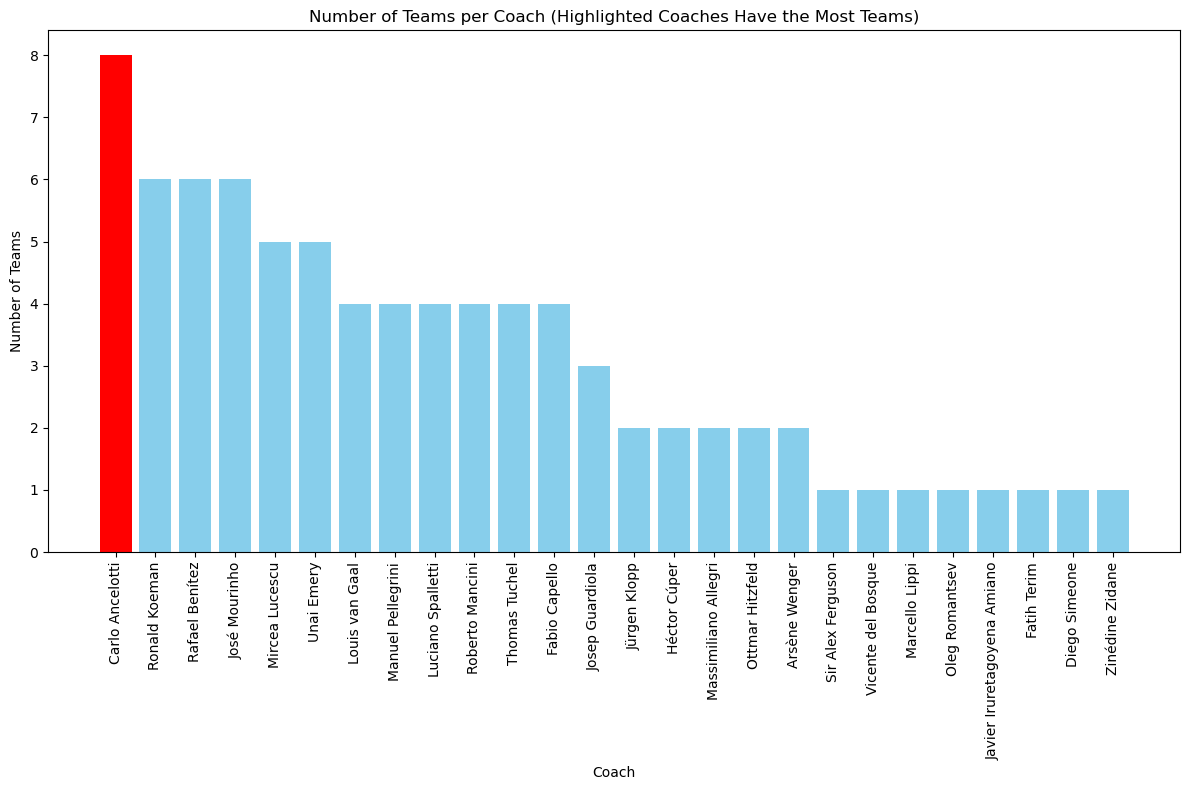

In [26]:
import matplotlib.pyplot as plt

# Prepare a color list to highlight the specific coaches
colors = ['red' if coach in coaches_max_teams else 'skyblue' for coach in coach_team_counts_all_sorted['Coach']]

plt.figure(figsize=(12, 8))
plt.bar(coach_team_counts_all_sorted['Coach'], coach_team_counts_all_sorted['num_teams'], color=colors)
plt.xlabel('Coach')
plt.ylabel('Number of Teams')
plt.title('Number of Teams per Coach (Highlighted Coaches Have the Most Teams)')
plt.xticks(rotation=90)  # Rotate labels to fit them
plt.tight_layout()  # Adjust layout
plt.show()


In [27]:
# so we can observe that Carlo Ancheloti is the coach who appeared on the UEFA with the highest number of teams 
# now lets vien this comparation by the number of appearencs in general 

In [28]:
coach_appearances = CoachesData.groupby('Coach')['Appearance'].sum().reset_index()
coach_appearances_sorted = coach_appearances.sort_values('Appearance', ascending=False)
coach_appearances_sorted

,Coach,Appearance
1,Carlo Ancelotti,191
21,Sir Alex Ferguson,190
0,Arsène Wenger,178
7,Josep Guardiola,159
8,José Mourinho,145
15,Mircea Lucescu,115
9,Jürgen Klopp,100
14,Massimiliano Allegri,100
18,Rafael Benítez,95
17,Ottmar Hitzfeld,95


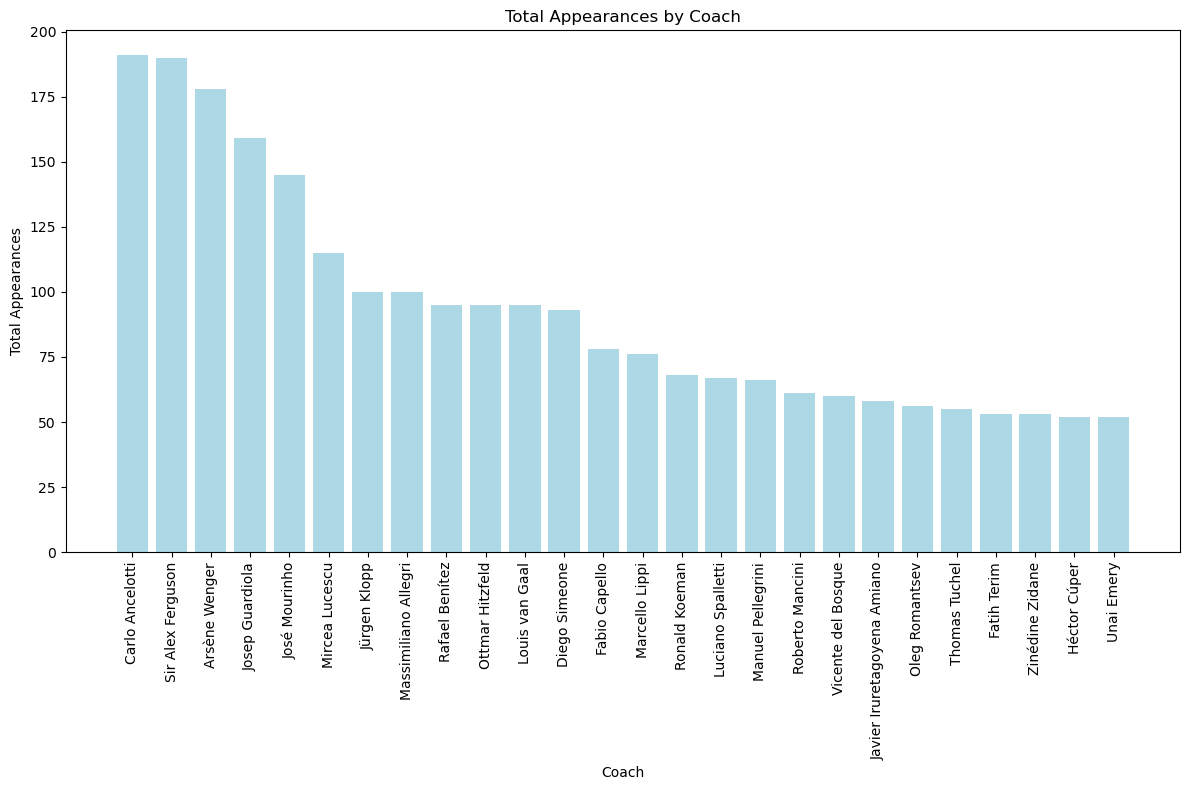

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.bar(coach_appearances_sorted['Coach'], coach_appearances_sorted['Appearance'], color='lightblue')
plt.xlabel('Coach')
plt.ylabel('Total Appearances')
plt.title('Total Appearances by Coach')
plt.xticks(rotation=90)  # Rotate labels to fit them
plt.tight_layout()  # Adjust layout
plt.show()


In [30]:
# we can see that logically Carlo was with 8 different clubs so it is kind of normal to have the most appearences, but it is
# not the same case for Dir lex and Arsen Wenger they both trained only one club during their career bt stil they appeared in the league for an interresting tm

In [31]:
RankingByName

,Position,Club,Country,Participated,Titles,Played,Win,Draw,Loss,Goals For,Goals Against,Pts,Goal Diff
0,1,Real Madrid CF,ESP,53,14,476,285,81,110,1047,521.0,651.0,526.0
1,2,FC Bayern München,GER,39,6,382,229,76,77,804,373.0,534.0,431.0
2,3,FC Barcelona,ESP,33,5,339,197,76,66,667,343.0,470.0,324.0
3,4,Manchester United,ENG,30,3,293,160,69,64,533,284.0,389.0,249.0
4,5,Juventus,ITA,37,2,301,153,70,78,479,301.0,376.0,178.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,532,CS Stade Dudelange,LUX,1,0,2,0,0,2,0,18.0,0.0,-18.0
532,533,Rabat Ajax FC,MLT,2,0,4,0,0,4,0,20.0,0.0,-20.0
533,534,Keflavík,ISL,4,0,8,0,0,8,5,35.0,0.0,-30.0
534,535,US Luxembourg,LUX,5,0,10,0,0,10,3,43.0,0.0,-40.0


In [32]:
# lets see the strongest teams on the attack 
import pandas as pd

# Assuming RankingByName is already loaded as a DataFrame
# Now, sort the DataFrame based on 'Goals For' in descending order
top_attack_teams = RankingByName.sort_values(by='Goals For', ascending=False).head(3)

# Display the top 5 teams with the strongest attack (highest 'Goals For')
print(top_attack_teams[['Position', 'Club', 'Country', 'Goals For']])


   Position               Club Country  Goals For
0         1     Real Madrid CF     ESP       1047
1         2  FC Bayern München     GER        804
2         3       FC Barcelona     ESP        667


In [33]:
# so we can observ that Real Madrid is more aggressive on the attack compared to the other teams and come Fc Barcelona 3thd 
# now lets view the deefence 

In [34]:
import pandas as pd

# Assuming RankingByName is already loaded as a DataFrame
# Now, sort the DataFrame based on 'Goals For' in descending order
top_attack_teams = RankingByName.sort_values(by='Goals Against', ascending=False).head(3)

# Display the top 5 teams with the strongest attack (highest 'Goals For')
print(top_attack_teams[['Club', 'Goals Against']])


                Club  Goals Against
0     Real Madrid CF          521.0
1  FC Bayern München          373.0
2       FC Barcelona          343.0


In [35]:
# we can see that Real madrid Also conceeded the most goals in the League, with Barcelona comming again in the 3thd place, 
# so how are gonna descover wich team is more efficient between these 3, is to compare their Goal difference luckely we already have that calculated in our dataset 

In [36]:
efficient_team = top_attack_teams.sort_values(by='Goal Diff' , ascending=False )
efficient_team

,Position,Club,Country,Participated,Titles,Played,Win,Draw,Loss,Goals For,Goals Against,Pts,Goal Diff
0,1,Real Madrid CF,ESP,53,14,476,285,81,110,1047,521.0,651.0,526.0
1,2,FC Bayern München,GER,39,6,382,229,76,77,804,373.0,534.0,431.0
2,3,FC Barcelona,ESP,33,5,339,197,76,66,667,343.0,470.0,324.0


In [37]:
# so now we can say that Real Madrid is more efficient 

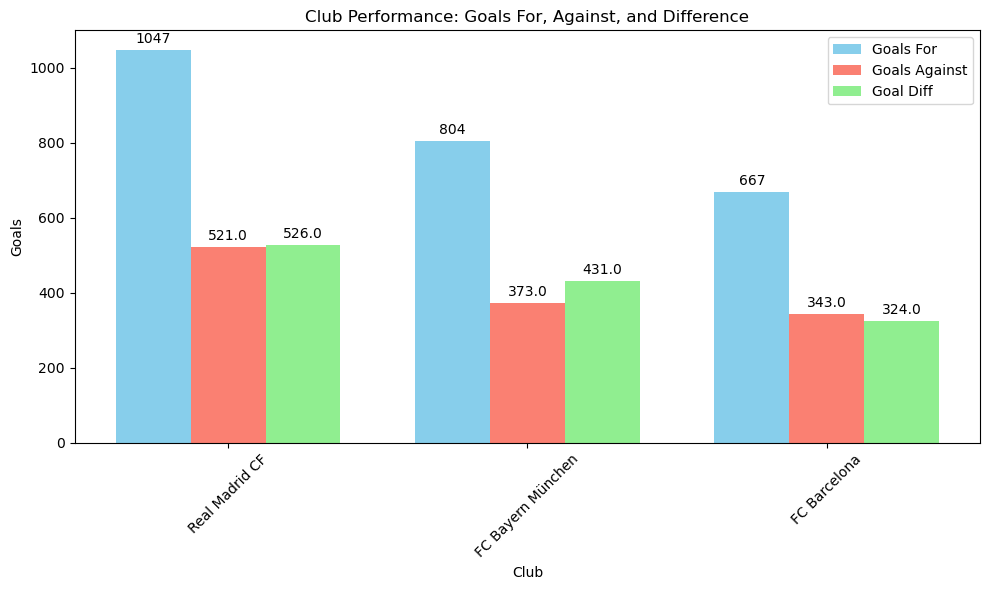

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Setting the positions and width for the bars
positions = np.arange(len(efficient_team['Club']))
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting "Goals For"
goals_for_bars = ax.bar(positions - width, efficient_team['Goals For'], width, label='Goals For', color='skyblue')

# Plotting "Goals Against"
goals_against_bars = ax.bar(positions, efficient_team['Goals Against'], width, label='Goals Against', color='salmon')

# Plotting "Goal Diff"
goal_diff_bars = ax.bar(positions + width, efficient_team['Goal Diff'], width, label='Goal Diff', color='lightgreen')

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Club')
ax.set_ylabel('Goals')
ax.set_title('Club Performance: Goals For, Against, and Difference')
ax.set_xticks(positions)
ax.set_xticklabels(efficient_team['Club'], rotation=45)
ax.legend()

# Function to add labels on bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function to add labels
add_labels(goals_for_bars)
add_labels(goals_against_bars)
add_labels(goal_diff_bars)

plt.tight_layout()
plt.show()


In [39]:
# these are now considered as the 3 strongest Attacking clubs in the UEFA

In [40]:
# so now we see that again Real Madrid comes in number one as the most titled club, and Ac Milan is second with 7 titles, while Liverpool is the 3thd with 6 tiltles

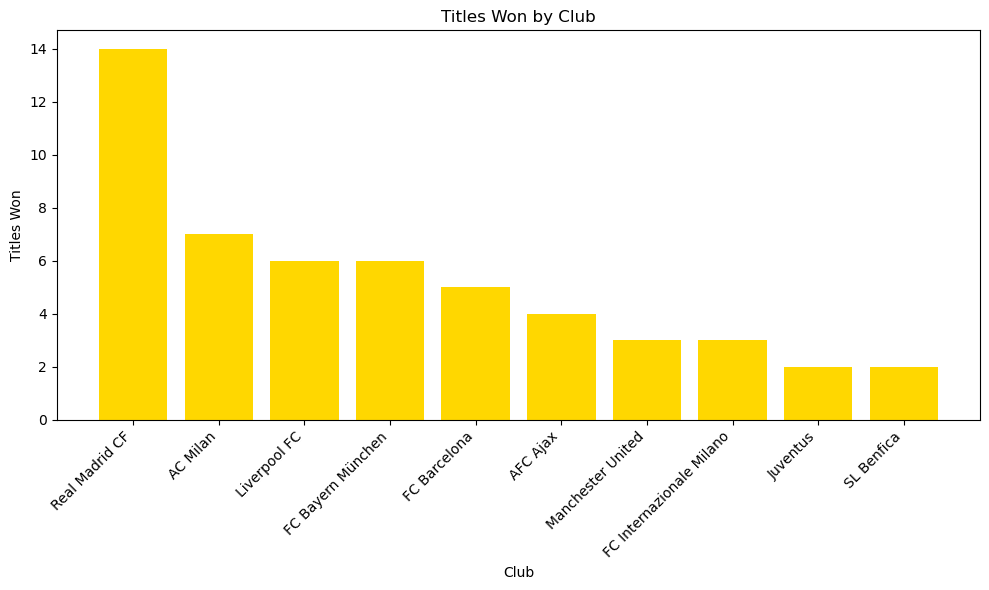

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'efficient_team' is your DataFrame and is already loaded

# Sorting the DataFrame based on 'Titles' in descending order
sorted_teams_by_titles = RankingByName.sort_values(by='Titles', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(sorted_teams_by_titles['Club'], sorted_teams_by_titles['Titles'], color='gold')

# Adding some text for labels, title, and custom x-axis tick labels, etc.
plt.xlabel('Club')
plt.ylabel('Titles Won')
plt.title('Titles Won by Club')
plt.xticks(rotation=45, ha="right")  # Rotate labels to avoid overlap

plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


In [42]:
# now let's see the 10 most participated clubs in this league

In [43]:
# we can see that there are clubs that participated more than the others so let's try to answer the following question : 
# What is the impact of participation frequency on winning titles? 

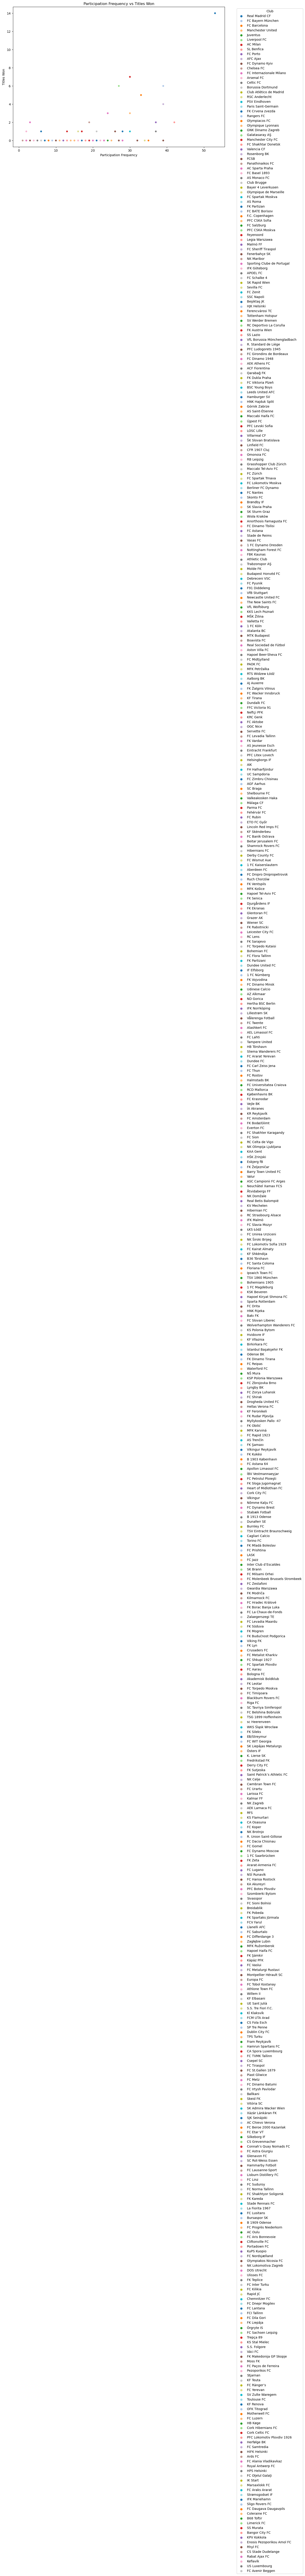

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# EDA: Participation Frequency vs Titles Won

# Scatter Plot to visualize the relationship
plt.figure(figsize=(12, 8))  # Increased figure size for better visibility
sns.scatterplot(x='Participated', y='Titles', hue='Club', data=RankingByName, palette='tab20', legend='brief')
plt.title('Participation Frequency vs Titles Won')
plt.xlabel('Participation Frequency')
plt.ylabel('Titles Won')
plt.legend(title='Club', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend placement
plt.show()

Correlation matrix between Participated and Titles:
               Participated    Titles
Participated      1.000000  0.519167
Titles            0.519167  1.000000


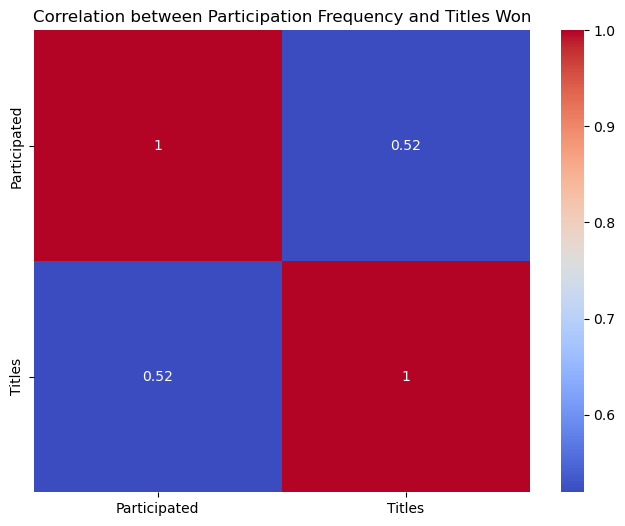

In [45]:
# Correlation analysis
correlation_matrix = RankingByName[['Participated', 'Titles']].corr()
print("Correlation matrix between Participated and Titles:\n", correlation_matrix)

# Visualizing the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Participation Frequency and Titles Won')
plt.show()

In [46]:
#A coefficient of 0.519 suggests a moderate positive linear relationship between the frequency of participation
#(Participated) and the number of titles won (Titles). This means that, to some extent, as the number of participations
#increases, the number of titles won also tends to increase. However, this relationship is not very strong, indicating
#that other factors also play significant roles in determining the number of titles won.

In [47]:
# so this is what everyone thinks that if you participate more you win titles more but as we can see on the 
#coorelation heatmap we can assure that it is not the only factor that participation is tnot the only factor 
#that effects winningso lets study the coorelation between all our variables, 


Correlation matrix between Participated and Titles:
                  Titles    Played       Win      Draw      Loss  Goals For  \
Titles         1.000000  0.689602  0.786896  0.638120  0.498945   0.787170   
Played         0.689602  1.000000  0.976577  0.980872  0.945893   0.977586   
Win            0.786896  0.976577  1.000000  0.943936  0.859959   0.996091   
Draw           0.638120  0.980872  0.943936  1.000000  0.922807   0.942138   
Loss           0.498945  0.945893  0.859959  0.922807  1.000000   0.870724   
Goals For      0.787170  0.977586  0.996091  0.942138  0.870724   1.000000   
Goals Against  0.583293  0.972071  0.911605  0.946201  0.984817   0.923474   
Pts            0.765991  0.985702  0.998121  0.962391  0.878958   0.994570   
Goal Diff      0.858140  0.690440  0.823007  0.651195  0.434650   0.813674   

               Goals Against       Pts  Goal Diff  
Titles              0.583293  0.765991   0.858140  
Played              0.972071  0.985702   0.690440  
Win       

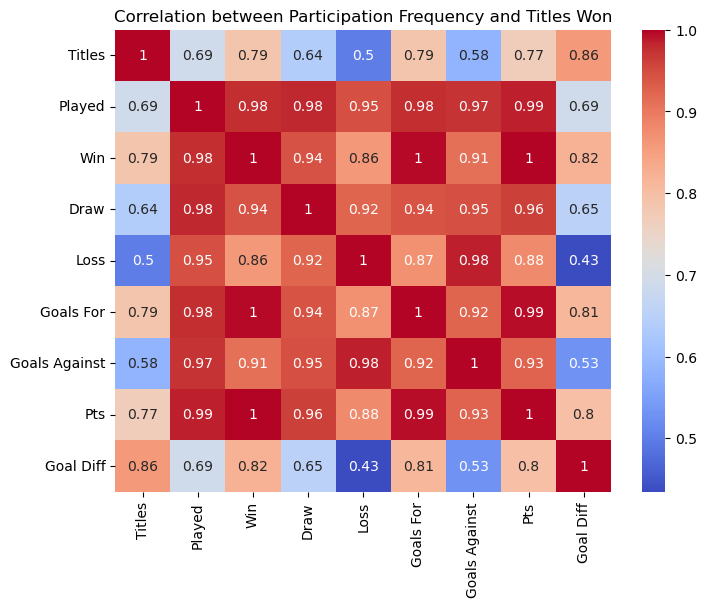

In [48]:
# Correlation analysis
correlation_matrix = RankingByName[['Titles', 'Played', 'Win' ,'Draw' , 'Loss' , 'Goals For' ,'Goals Against' ,'Pts' ,'Goal Diff']].corr()
print("Correlation matrix between Participated and Titles:\n", correlation_matrix)

# Visualizing the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Participation Frequency and Titles Won')
plt.show()

In [49]:
# now this is perfect and gives us the opportunitie to descover the relations between our variables

In [50]:
# lets Break down the the relations that can help a team win a title 
# Titles Correlate with Winning, Goal Difference, and Goals For: The number of titles (Titles) a team has won
# correlates strongly with several factors: wins (0.786896), goal difference (Goal Diff) (0.858140),
# and goals for (0.787170). This implies that teams that win more matches, have a higher goal difference,
# and score more goals are more likely to win titles. Goal difference, in particular, 
# stands out as having a slightly higher correlation with titles than other factors, emphasizing the importance
#of both scoring goals and maintaining a strong defense.

In [51]:
most_participated_team = RankingByName.sort_values(by='Participated' , ascending=False )
most_participated_team.head(3)

,Position,Club,Country,Participated,Titles,Played,Win,Draw,Loss,Goals For,Goals Against,Pts,Goal Diff
0,1,Real Madrid CF,ESP,53,14,476,285,81,110,1047,521.0,651.0,526.0
7,8,SL Benfica,POR,42,2,287,130,67,90,475,334.0,327.0,141.0
1,2,FC Bayern München,GER,39,6,382,229,76,77,804,373.0,534.0,431.0


In [52]:
# group by country and aggregate the sum of titles
country_titles = RankingByName.groupby('Country')['Titles'].sum().reset_index()
country_titles_sorted = country_titles.sort_values('Titles', ascending=False)
country_titles_sorted

,Country,Titles
14,ESP,19
13,ENG,15
27,ITA,12
20,GER,8
37,NED,6
41,POR,4
46,SRB,1
44,SCO,1
42,ROU,1
17,FRA,1


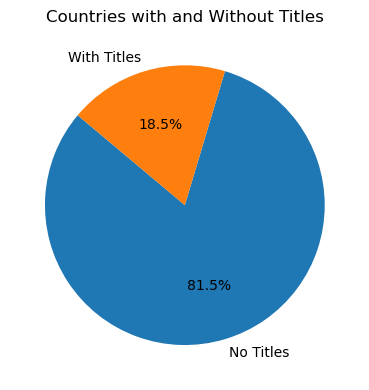

In [53]:
# plot the countries with 0 title and the ones with the titles in a cerclular chart, and to do that group the countries with 0 titles in one group and the ones with titles in another group

# Create a new column 'Title Group' to categorize countries with and without titles
country_titles_sorted['Title Group'] = country_titles_sorted['Titles'].apply(lambda x: 'No Titles' if x == 0 else 'With Titles')

# Count the number of countries in each group
title_group_counts = country_titles_sorted['Title Group'].value_counts()

# Plot the data
plt.figure(figsize=(4, 4))
plt.pie(title_group_counts, labels=title_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Countries with and Without Titles')
plt.tight_layout()
plt.show()




In [54]:
# we can see that the majority of the countries have no titles in the champions league so it is a very hard competition to win 
# and only a few of teams with specific countries have won the title

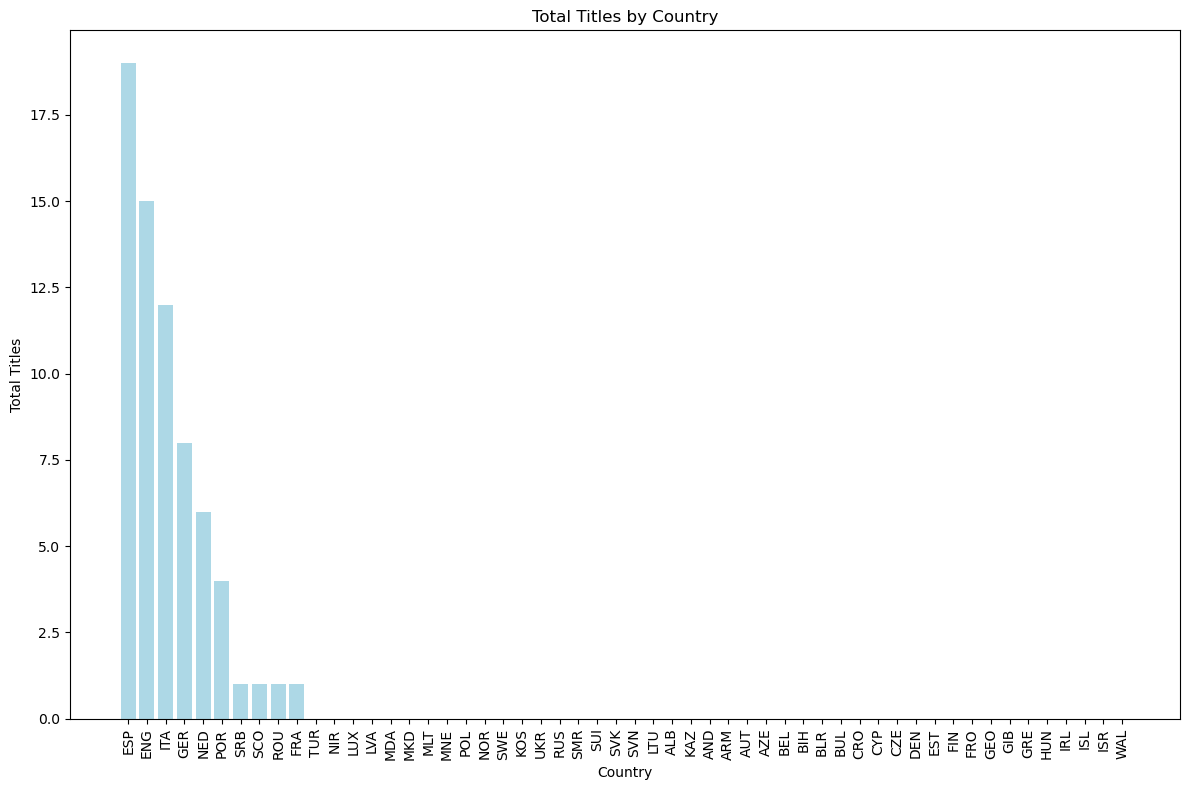

In [55]:
# plot the countries with 0 title and the ones with the titles to separate my data into 2 parts 
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.bar(country_titles_sorted['Country'], country_titles_sorted['Titles'], color='lightblue')
plt.xlabel('Country')
plt.ylabel('Total Titles')
plt.title('Total Titles by Country')
plt.xticks(rotation=90)  # Rotate labels to fit them
plt.tight_layout()  # Adjust layout
plt.show()


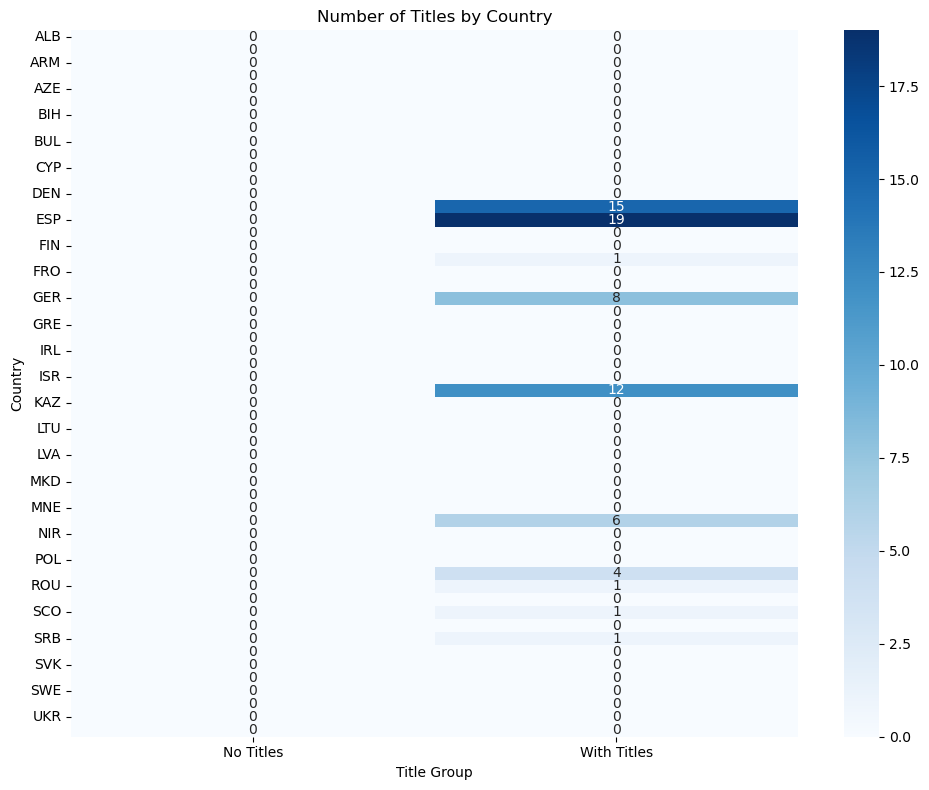

In [56]:
# as we can see over here the countries that dominates winning the champions league are Spain, England, Italy and Germany
# in the previous coorelation we did not study the relation between the countries and the title won so lets apply that on our data

country_titles_sorted = country_titles_sorted.sort_values('Titles' , ascending=False)

# study the coorelation between the countries and the titles won by a heat map
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table for the heatmap
country_titles_pivot = country_titles_sorted.pivot(index='Country', columns='Title Group', values='Titles').fillna(0)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(country_titles_pivot, annot=True, fmt='g', cmap='Blues')
plt.title('Number of Titles by Country')
plt.xlabel('Title Group')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


In [57]:
# so we can observe that you are more ikely to win the champions league if you are from Spain, England, Italy or Germany because there is as strong positive relation between the countries and the titles won

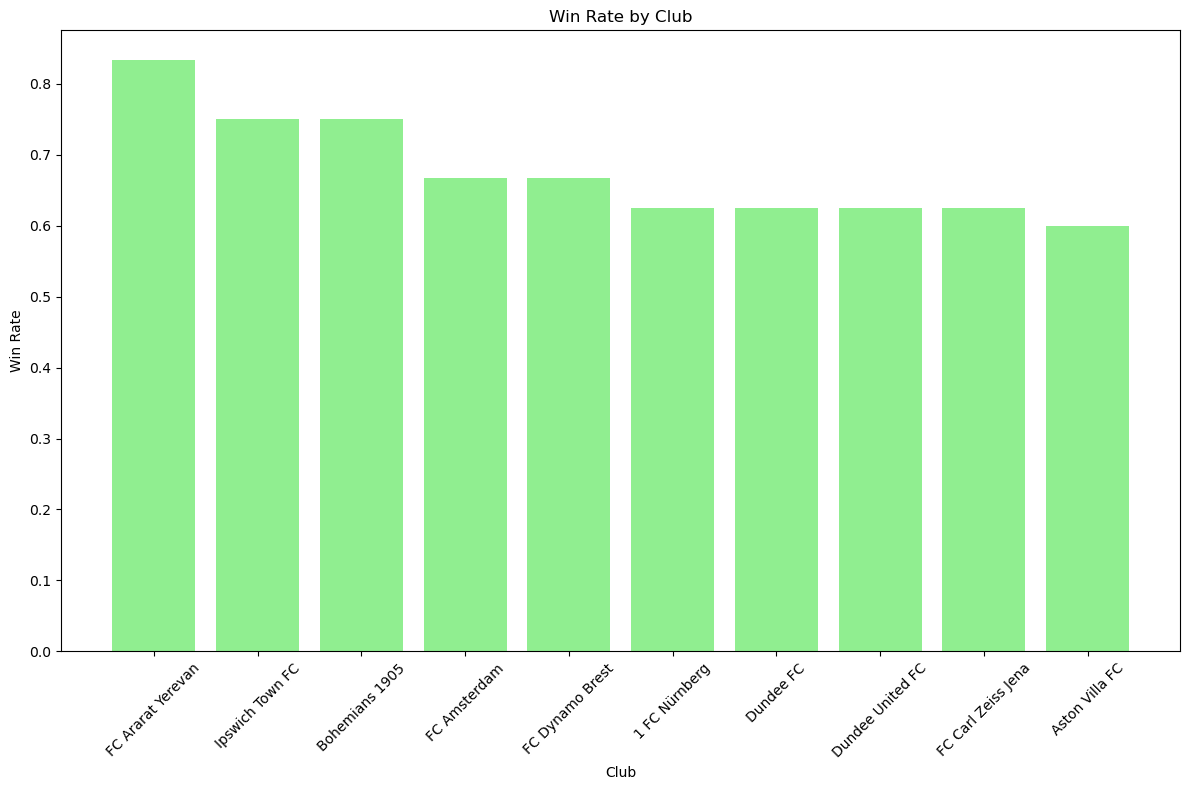

In [59]:
# now lets see What is the win rate for each club?  
# Create a new column 'Win Rate' to calculate the win rate for each club 
RankingByName['Win Rate'] = RankingByName['Win'] / RankingByName['Played']

# Sort the DataFrame based on 'Win Rate' in descending order
sorted_win_rate = RankingByName.sort_values(by='Win Rate', ascending=False).head(10)

# Plot the win rate for the top 10 clubs
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.bar(sorted_win_rate['Club'], sorted_win_rate['Win Rate'], color='lightgreen')
plt.xlabel('Club')
plt.ylabel('Win Rate')
plt.title('Win Rate by Club')
plt.xticks(rotation=45)  # Rotate labels to fit them
plt.tight_layout()  # Adjust layout
plt.show()




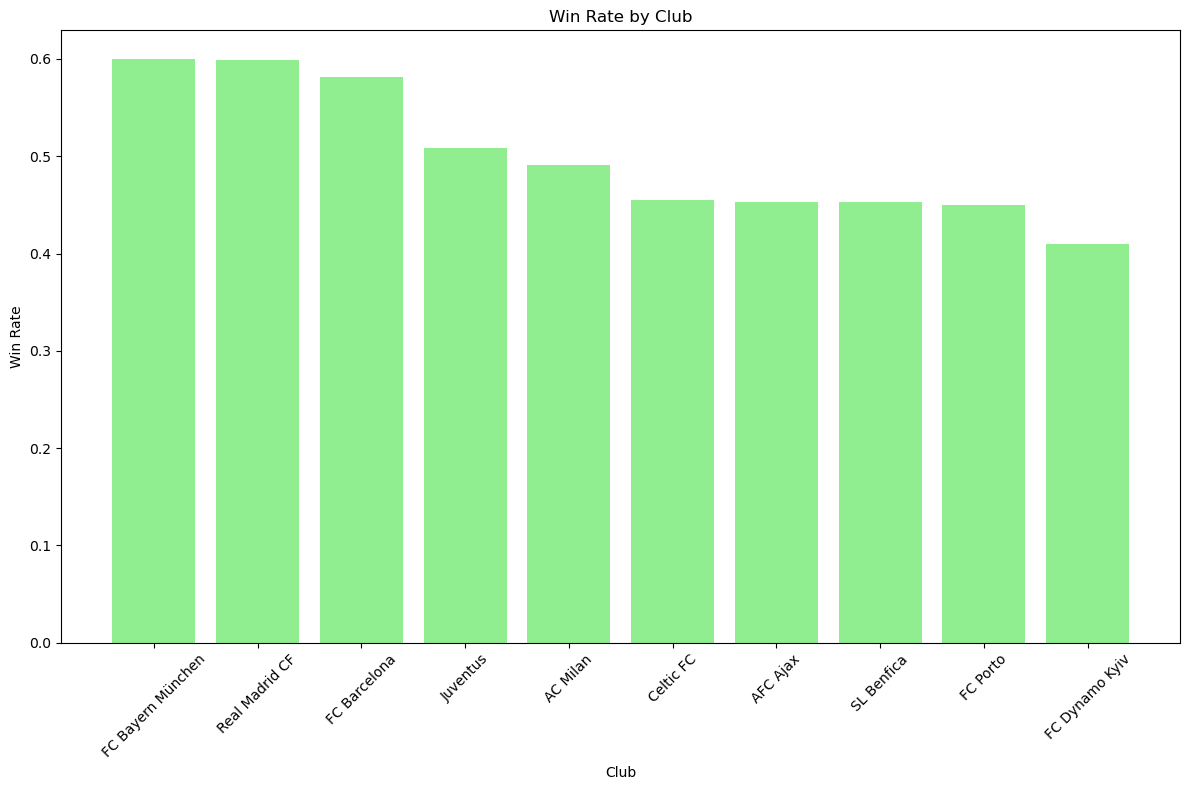

In [75]:
# this can not be what are we looking for because these clubs are not the most participated ones so lets see the win rate for the most participated clubs

# Create a new column 'Win Rate' to calculate the win rate for each club
RankingByName['Win Rate'] = RankingByName['Win'] / RankingByName['Played']

# Sort the DataFrame based on 'Win Rate' in descending order
sorted_win_rate = RankingByName.sort_values(by='Participated', ascending=False).head(15)
sorted_win_rate = sorted_win_rate.sort_values(by='Win Rate', ascending=False).head(10)
sorted_win_rate

# Plot the win rate for the top 10 clubs
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.bar(sorted_win_rate['Club'], sorted_win_rate['Win Rate'], color='lightgreen')
plt.xlabel('Club')
plt.ylabel('Win Rate')
plt.title('Win Rate by Club')
plt.xticks(rotation=45)  # Rotate labels to fit them
plt.tight_layout()  # Adjust layout
plt.show()

In [ ]:
# Bayern Munich is the club with the highest win rate, followed by Real Madrid and Barcelona. 